In [3]:
import numpy as np
import warnings
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10


In [5]:

seed = 1842
tf.random.set_seed(seed)
np.random.seed(seed)
warnings.simplefilter('ignore')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],# brightness
        validation_split=0.2,)


#Train & Validation Split
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=r"/content/drive/MyDrive/test/test",
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="training",

                                                 class_mode='binary')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=r"/content/drive/MyDrive/train/train",
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="validation",

                                                 class_mode='binary')

Found 430 images belonging to 2 classes.
Found 426 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape = [224, 224,3]),
    MaxPooling2D(),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (2, 2), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation ='sigmoid')
])

In [8]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 54, 54, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,913,729 (91.22 MB)

 Trainable params: 23,913,729 (91.22 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

r=model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 487s 29s/step - accuracy: 0.5603 - loss: 2.7737 - val_accuracy: 0.7207 - val_loss: 0.5968
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6532 - loss: 0.6470 - val_accuracy: 0.7512 - val_loss: 0.5675
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7362 - loss: 0.5692 - val_accuracy: 0.7418 - val_loss: 0.5787
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7187 - loss: 0.6632 - val_accuracy: 0.7371 - val_loss: 0.5975
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7485 - loss: 0.5753 - val_accuracy: 0.7230 - val_loss: 0.6811
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7791 - loss: 0.5106 - val_accuracy: 0.6925 - val_loss: 0.6050
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7951 - loss: 0.4848 - val_accuracy: 0.7887 - val_loss: 0.5416
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7928 - loss: 0.4732 - val_accuracy: 0.7981 - val_los

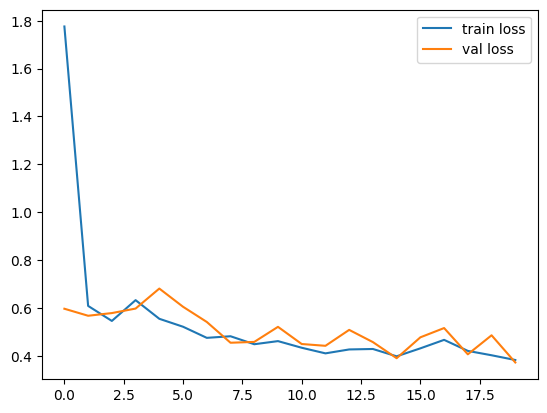

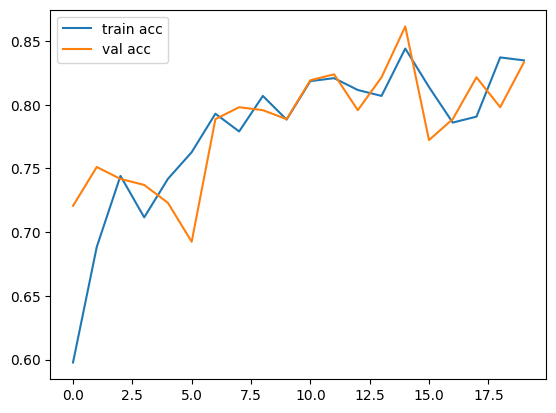

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/test/test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

Found 537 images belonging to 2 classes.
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 532ms/step - accuracy: 0.8769 - loss: 0.2769
Test Loss: 0.317
Test Accuracy: 0.868


In [14]:
from sklearn.metrics import confusion_matrix
# Generate predicted class probabilities for test data
y_pred = model.predict(test_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels for test data
y_true_classes = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step
[[390   0]
 [147   0]]


In [16]:
from tensorflow.keras.models import load_model

model.save('my_model.keras')

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [18]:
image_path = r"/content/drive/MyDrive/test/test/tender/1 (1).jpg"
image = load_img(image_path, target_size=(128,128))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

In [20]:
model = tf.keras.models.load_model("my_model.keras")

In [21]:
image_path = r"/content/drive/MyDrive/test/test/vacancy/FB_IMG_1531191663457-300x238.jpg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[[0.99675685]]


In [22]:
image_path = r"/content/drive/MyDrive/test/test/vacancy/FB_IMG_1531191663457-300x238.jpg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)
max_prob = np.max(prediction)
if(max_prob < 0.8 and max_prob > 0.3):
    print("The image does not belong to any of the trained classes.")
else:
    class_idx = np.argmax(prediction)
    if class_idx < 0.2:
        print("The image is predicted to belong to class 0 (tender).")
    elif class_idx > 0.8:
        print("The image is predicted to belong to class 1 (vacancies).")
    else:
        print("The image is predicted to belong to class 2 (other).")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The image is predicted to belong to class 0 (tender).


# New Section